In [110]:
import pandas as pd
import requests
import numpy as np
import json
from bs4 import BeautifulSoup as bs
import random
import time
import json
import pickle

In [143]:
gran_df = pd.DataFrame()
for i in range(1, 21):
    mini_df = pd.DataFrame()
    with open(f"listas_usuarios_{i}.pickle", "rb") as archivo:
        listas = pickle.load(archivo)
    for user_id, value in listas.items():
        name = value.pop("nombre")
        tipo = value.pop("tipo")
        if tipo != "publica":
            continue
        value = {x[0]: x[1][0] for x in value.items() if (x[1][1] == 2) and (x[1][0] > 0)}
        if len(value) == 0:
            continue
        dato = {f"{user_id}:{name}": value}
        dato_df = pd.DataFrame.from_dict(dato, orient='columns')
        mini_df = pd.concat([mini_df, dato_df], axis=1)
    gran_df = pd.concat([gran_df, mini_df], axis=1)

In [144]:
pd.set_option('display.max_rows', 100)
gran_df

,39110:xxbladexx20,216949:haijuta,246587:d3athzero,107198:JayJay1401,45036:Seleare,4328:Joseph_,110895:Rudenick,93256:Moltke,160129:dander,256598:melandrea,...,16805797:iambabymango,16809902:Flopoflop,16791488:RhaenyraFR,16838607:SasOnator,17063891:Dezwhite05,17197026:dumb_zoro_,16617450:kotyboh,16459755:Tiberjuice,16965619:Watcher794_2,16656371:Aoto_uchiha10
24,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,8.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
gran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [125]:
# It is better to make this dataframe a sparse one
gran_df_sparse = gran_df.astype(pd.SparseDtype(np.float64, fill_value=np.nan))
gran_df_sparse.dtypes
gran_df_sparse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [126]:
del gran_df

In [127]:
gran_df_sparse

""


In [128]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'N° Usuarios que dieron review - N° Usuarios')

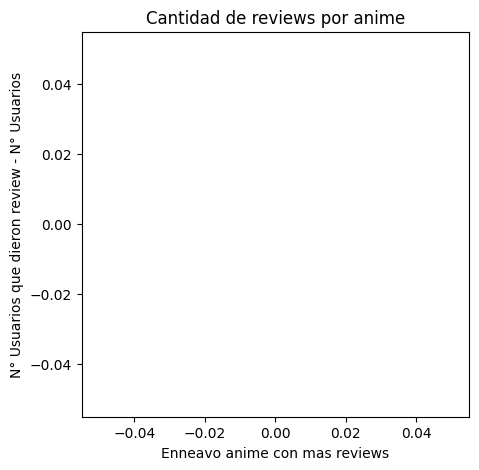

In [129]:
# Parcialmente inspirado en:
# https://stackoverflow.com/questions/45909776/sort-rows-of-a-dataframe-in-descending-order-of-nan-counts
serie_null = gran_df_sparse.isnull().sum(axis=1).mul(-1)
serie_null.sort_values(ascending=False, inplace=True)
serie_null.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5, 5))
plt.plot(serie_null)
plt.title("Cantidad de reviews por anime")
plt.xlabel("Enneavo anime con mas reviews",  # Añade etiquetas para las coordenadas
           fontdict={"fontsize": 10})
plt.ylabel("N° Usuarios que dieron review - N° Usuarios",
           fontdict={"fontsize": 10})

Text(0, 0.5, 'N° reviews por usuario - N° animes')

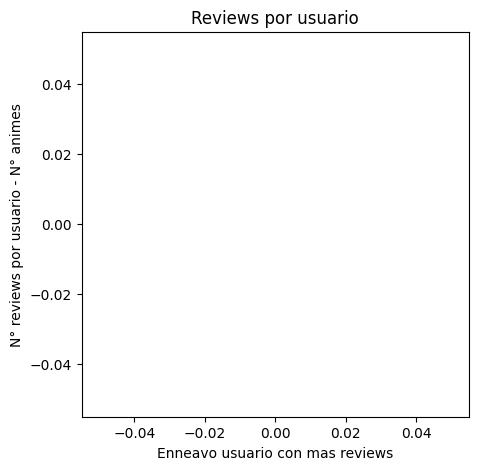

In [130]:
# Parcialmente inspirado en:
# https://stackoverflow.com/questions/45909776/sort-rows-of-a-dataframe-in-descending-order-of-nan-counts
serie_null = gran_df_sparse.isnull().sum(axis=0).mul(-1)
serie_null.sort_values(ascending=False, inplace=True)
serie_null.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5, 5))
plt.plot(serie_null)
plt.title("Reviews por usuario")
plt.xlabel("Enneavo usuario con mas reviews",  # Añade etiquetas para las coordenadas
           fontdict={"fontsize": 10})
plt.ylabel("N° reviews por usuario - N° animes",
           fontdict={"fontsize": 10})

In [131]:
gran_df_sparse.isnull().sum(axis=1).mul(-1)

Series([], dtype: float64)

In [132]:
gran_df_sparse["dif"] = gran_df_sparse.isnull().sum(axis=1).mul(-1)

In [133]:
gran_df_sparse

,dif


In [134]:
gran_df_sparse.sort_values(by="dif", ascending=False, axis=0)


,dif


In [109]:
listas

{3754155: {'nombre': 'Kazaaj',
  12189: [10, 2],
  4181: [9, 2],
  5081: [9, 2],
  170: [8, 2],
  7311: [8, 2],
  11061: [8, 2],
  12029: [8, 2],
  23847: [8, 2],
  30: [7, 2],
  72: [7, 2],
  849: [7, 2],
  4224: [7, 2],
  5114: [7, 2],
  9989: [7, 2],
  12431: [7, 2],
  14813: [7, 2],
  23273: [7, 2],
  1535: [6, 2],
  4382: [6, 2],
  5040: [6, 2],
  6114: [6, 2],
  9253: [6, 2],
  11577: [6, 2],
  11597: [6, 2],
  11933: [6, 2],
  16067: [6, 2],
  18897: [6, 2],
  22297: [6, 2],
  47: [5, 2],
  71: [5, 2],
  2167: [5, 2],
  5681: [5, 2],
  9756: [5, 2],
  10719: [5, 2],
  11887: [5, 2],
  15689: [5, 2],
  16049: [5, 2],
  16524: [5, 2],
  17265: [5, 2],
  20853: [5, 2],
  22147: [5, 2],
  22535: [5, 2],
  974: [4, 2],
  1689: [4, 2],
  2924: [4, 2],
  6213: [4, 2],
  6956: [4, 2],
  9760: [4, 2],
  14967: [4, 2],
  27787: [4, 2],
  356: [3, 2],
  9055: [3, 2],
  10711: [3, 2],
  11757: [3, 2],
  16001: [3, 2],
  23321: [3, 2],
  16: [0, 6],
  26: [0, 6],
  32: [0, 2],
  43: [0, 2],


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'N° Usuarios que dieron review - N° Usuarios')

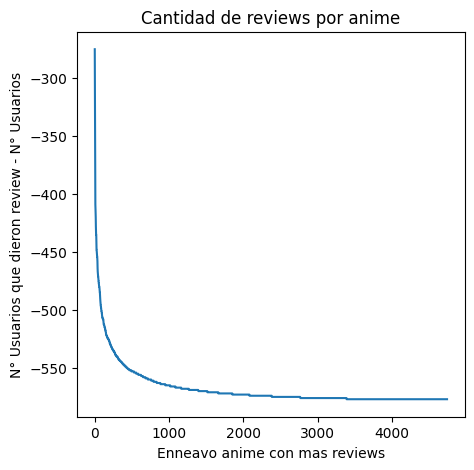

In [ ]:
# Parcialmente inspirado en:
# https://stackoverflow.com/questions/45909776/sort-rows-of-a-dataframe-in-descending-order-of-nan-counts
serie_null = gran_df_sparse.isnull().sum(axis=1).mul(-1)
serie_null.sort_values(ascending=False, inplace=True)
serie_null.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5, 5))
plt.plot(serie_null)
plt.title("Cantidad de reviews por anime")
plt.xlabel("Enneavo anime con mas reviews",  # Añade etiquetas para las coordenadas
           fontdict={"fontsize": 10})
plt.ylabel("N° Usuarios que dieron review - N° Usuarios",
           fontdict={"fontsize": 10})

Text(0, 0.5, 'N° reviews por usuario - N° animes')

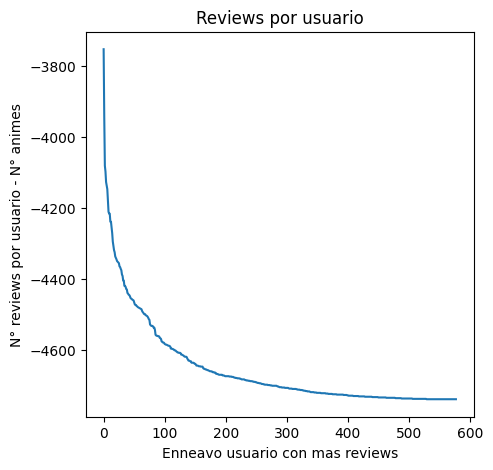

In [ ]:
# Parcialmente inspirado en:
# https://stackoverflow.com/questions/45909776/sort-rows-of-a-dataframe-in-descending-order-of-nan-counts
serie_null = gran_df_sparse.isnull().sum(axis=0).mul(-1)
serie_null.sort_values(ascending=False, inplace=True)
serie_null.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5, 5))
plt.plot(serie_null)
plt.title("Reviews por usuario")
plt.xlabel("Enneavo usuario con mas reviews",  # Añade etiquetas para las coordenadas
           fontdict={"fontsize": 10})
plt.ylabel("N° reviews por usuario - N° animes",
           fontdict={"fontsize": 10})

In [ ]:
gran_df_sparse.isnull().sum(axis=1).mul(-1)

30      -455
47      -519
71      -546
72      -554
170     -558
        ... 
2451    -577
8491    -577
15785   -577
2471    -577
696     -577
Length: 4741, dtype: int32

In [ ]:
gran_df_sparse["dif"] = gran_df_sparse.isnull().sum(axis=1).mul(-1)

In [ ]:
gran_df_sparse

,3754155:Kazaaj,4250973:orhanoror,4083845:Clowneater,4005687:tintin_anime,4182671:jyeoul,3554097:Drackulis,3512535:lopmon,3855241:LulubellNoah,4094111:enzothebest,4283379:gucio18911,...,4035465:iDuk,4090723:Richaross,3784149:RandomForever,4038015:Cherry12,3918423:yamanotesen,4073061:PKFanop,4144855:beckachu,3726901:Panzerx,3511913:kstinasunflower,dif
30,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,-455
47,5.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-519
71,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-546
72,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-554
170,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
8491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,-577
15785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,-577
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,-577


In [ ]:
gran_df_sparse.sort_values(by="dif", ascending=False, axis=0)


,3754155:Kazaaj,4250973:orhanoror,4083845:Clowneater,4005687:tintin_anime,4182671:jyeoul,3554097:Drackulis,3512535:lopmon,3855241:LulubellNoah,4094111:enzothebest,4283379:gucio18911,...,4035465:iDuk,4090723:Richaross,3784149:RandomForever,4038015:Cherry12,3918423:yamanotesen,4073061:PKFanop,4144855:beckachu,3726901:Panzerx,3511913:kstinasunflower,dif
16498,NaN,10.0,NaN,8.0,7.0,9.0,NaN,NaN,10.0,9.0,...,NaN,9.0,9.0,NaN,NaN,8.0,NaN,NaN,NaN,-275
11757,3.0,10.0,NaN,NaN,NaN,9.0,NaN,NaN,8.0,NaN,...,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,-295
1535,6.0,10.0,NaN,8.0,NaN,10.0,NaN,10.0,9.0,9.0,...,8.0,9.0,8.0,NaN,NaN,9.0,NaN,NaN,NaN,-315
5114,7.0,10.0,NaN,8.0,NaN,10.0,9.0,10.0,9.0,9.0,...,NaN,10.0,NaN,NaN,NaN,NaN,9.0,10.0,NaN,-362
19815,NaN,10.0,NaN,NaN,NaN,9.0,NaN,NaN,7.0,NaN,...,NaN,9.0,9.0,NaN,NaN,9.0,NaN,NaN,NaN,-381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
1409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
14653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
14117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-577
